# Veille Sur le Module pyplot du package Matplotlib de Python

## Sommaire

+ Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['axes.labelsize'] = 20

+ Chargement du Dataset Heart

In [2]:
df = pd.read_table('heart.txt')

+ Visualisation des 10 prémiers individu de notre Dataset

In [3]:
df.head(10)

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence
5,65,feminin,155,269,A,A,148,non,8,1,A,absence
6,51,masculin,110,175,A,A,123,non,6,1,A,absence
7,45,feminin,112,160,A,A,138,non,0,2,A,absence
8,55,masculin,130,262,A,A,155,non,0,1,A,absence
9,58,feminin,136,319,B,C,152,non,0,1,C,presence


+ Affichage des informations sur les variable du dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         270 non-null    int64 
 1   sexe        270 non-null    object
 2   pression    270 non-null    int64 
 3   cholester   270 non-null    int64 
 4   sucre       270 non-null    object
 5   electro     270 non-null    object
 6   taux_max    270 non-null    int64 
 7   angine      270 non-null    object
 8   depression  270 non-null    int64 
 9   pic         270 non-null    int64 
 10  vaisseau    270 non-null    object
 11  coeur       270 non-null    object
dtypes: int64(6), object(6)
memory usage: 25.4+ KB


1. ## Tracer de graphique pour chaque variable du Dataset avec Matplotlib.pyplot

+ ### Les variable quantitative

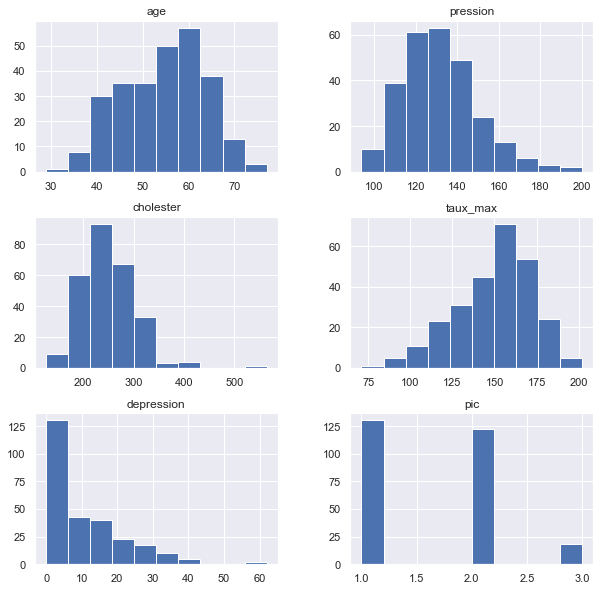

In [5]:
quanti_columns = ['age','pression','cholester','taux_max','depression','pic']
df.hist(figsize=(10,10),column = quanti_columns)
plt.show()

+ ### Les variables qualitative

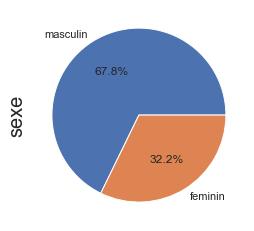

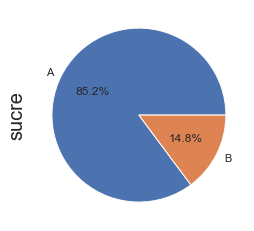

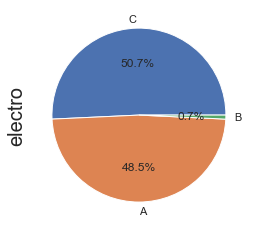

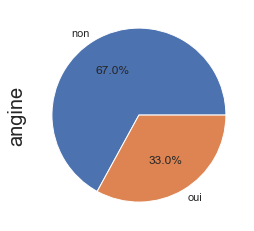

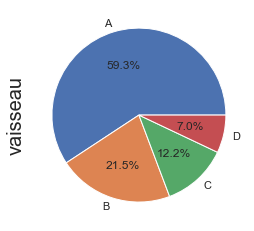

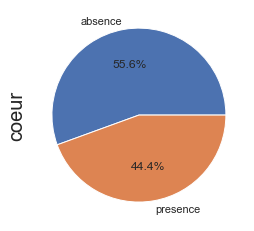

In [6]:
quali_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        quali_columns.append(col)
        df[col].value_counts().plot.pie(autopct="%.1f%%")
        plt.show()


 + ### Tracer des graphes des Variables du Dataset deux à deux

+ ### Les variables quantitative

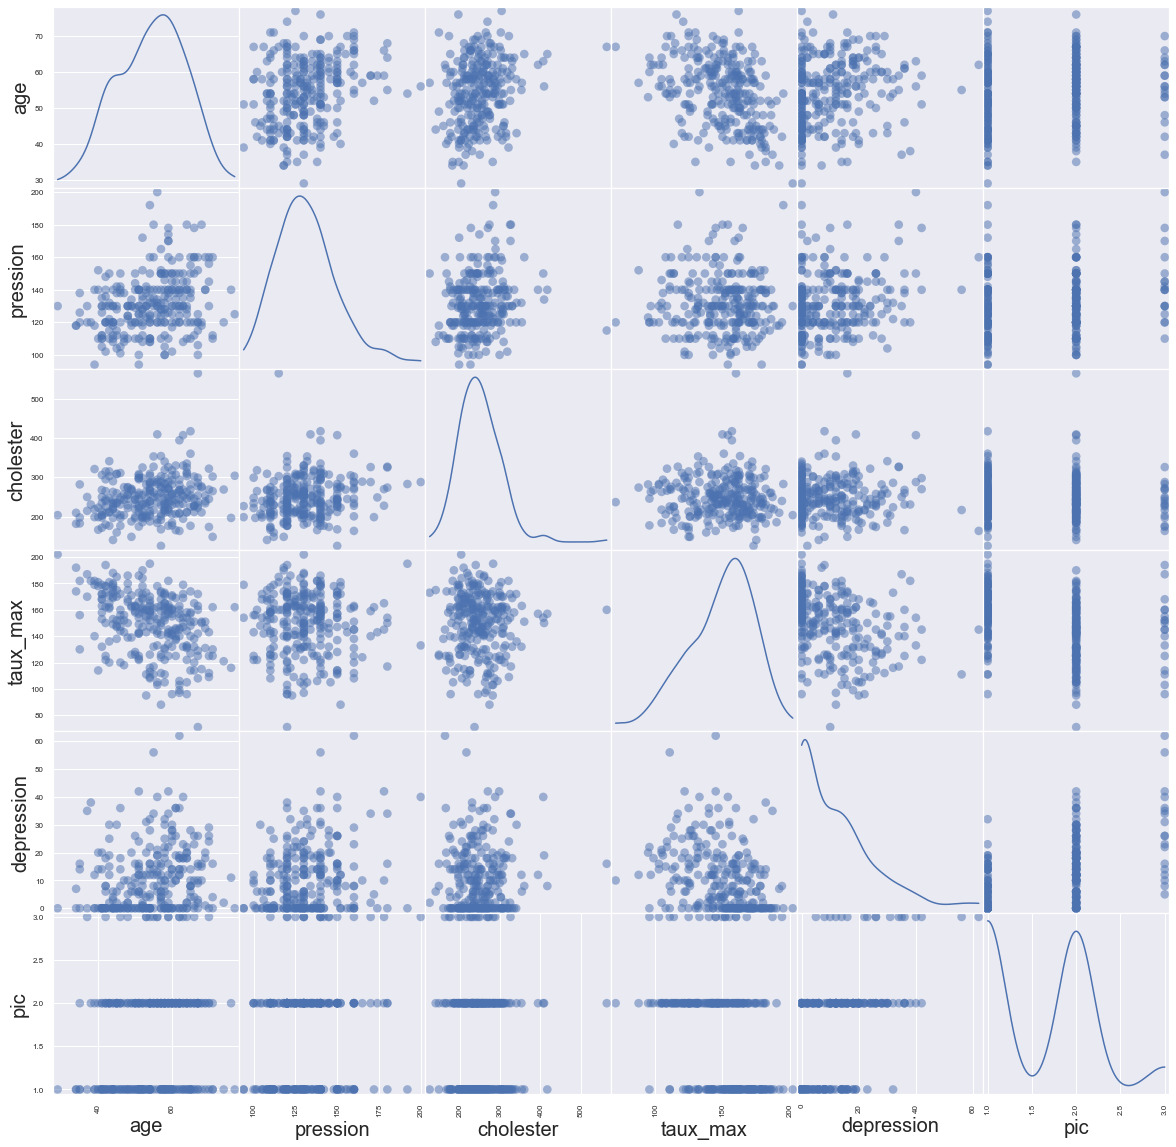

In [7]:
df_quanti = df[quanti_columns]
pd.plotting.scatter_matrix(df_quanti,diagonal='kde',figsize=(20,20),s=300)
plt.show()

+ ### Les variables quantitative et qualitative

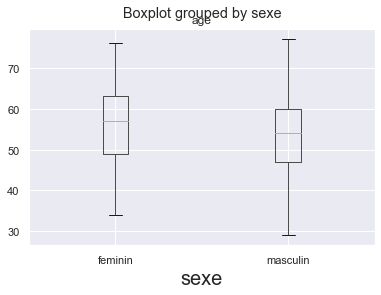

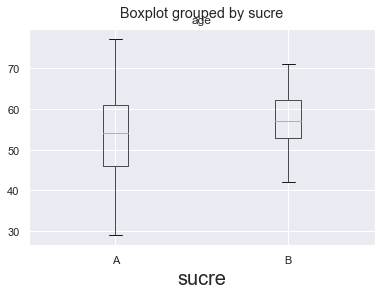

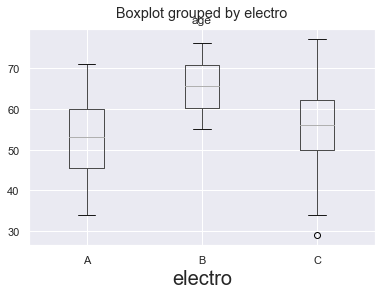

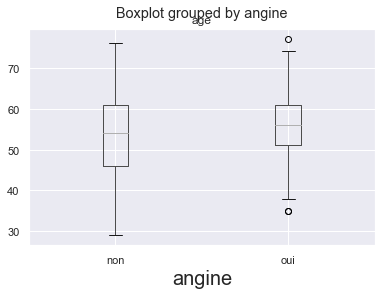

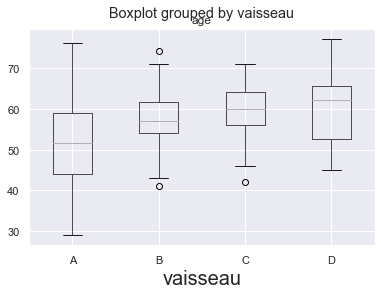

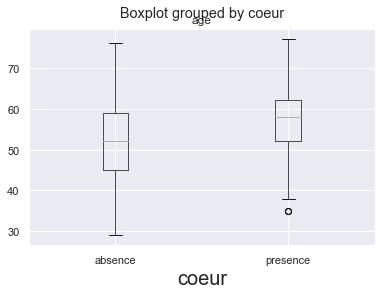

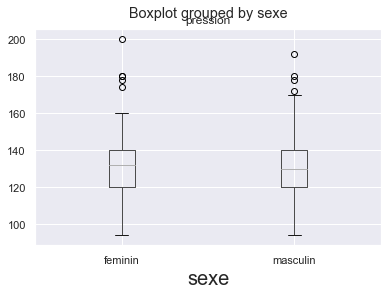

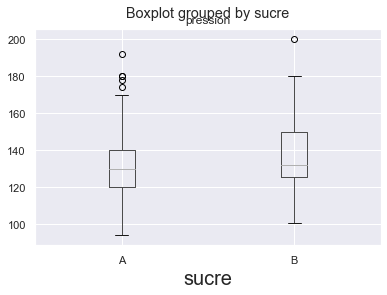

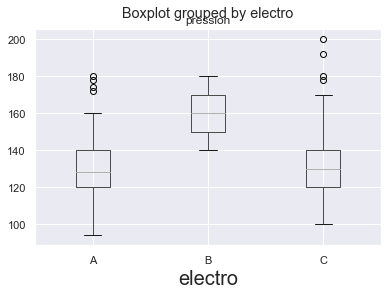

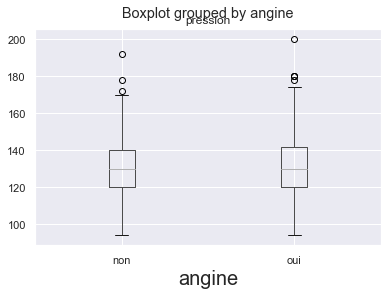

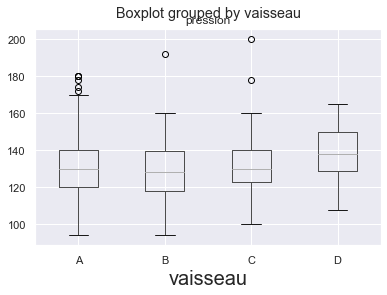

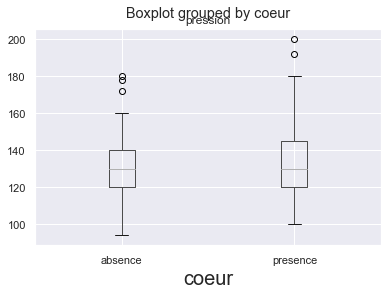

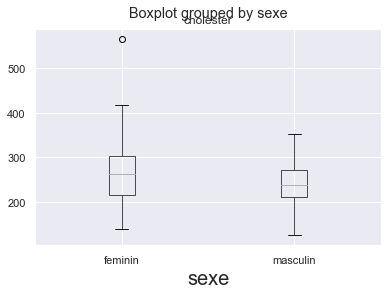

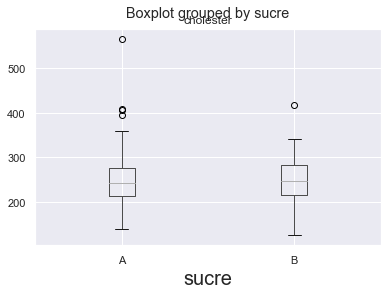

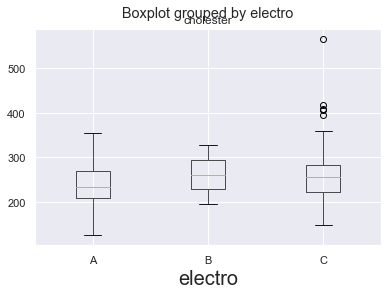

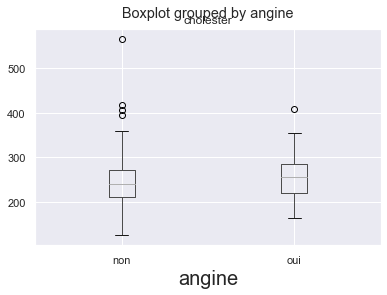

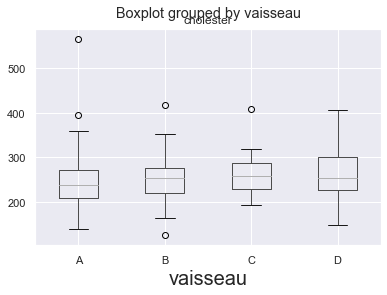

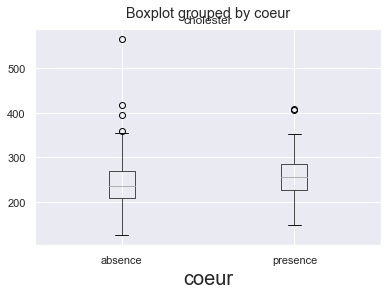

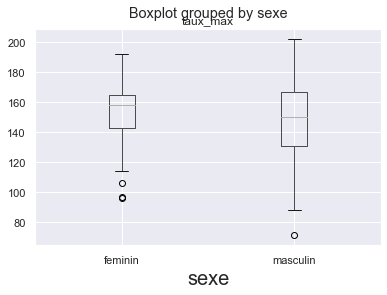

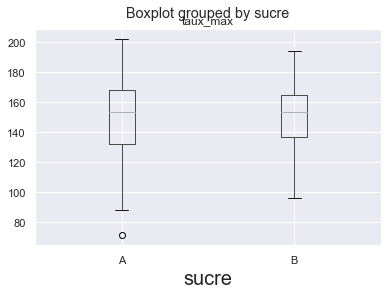

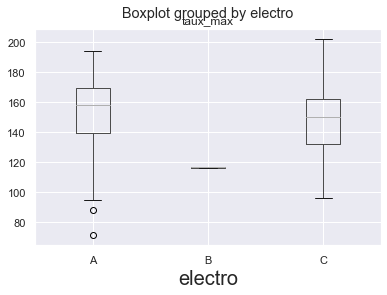

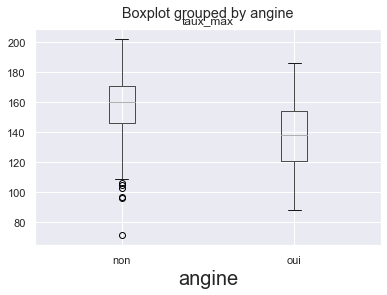

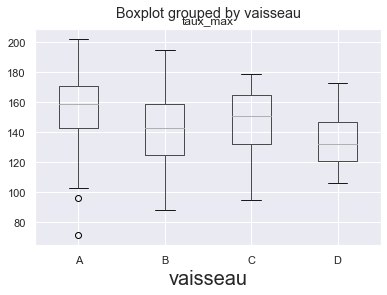

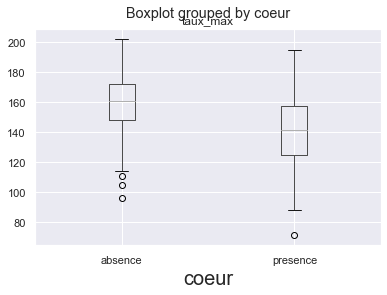

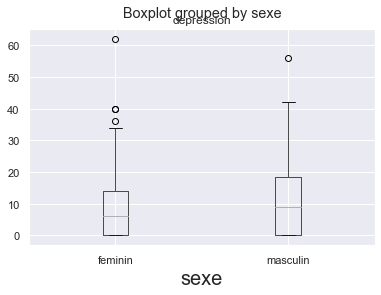

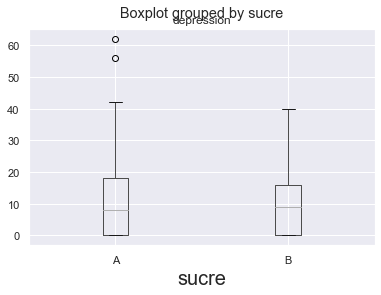

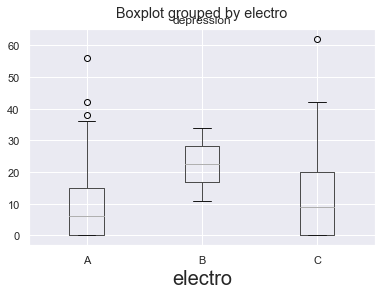

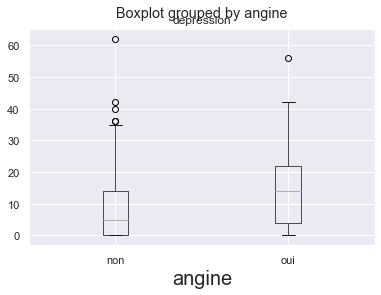

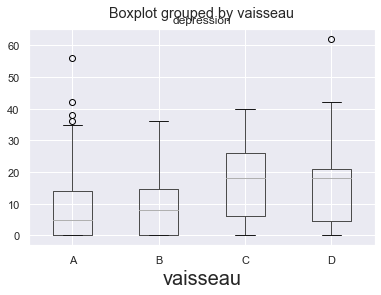

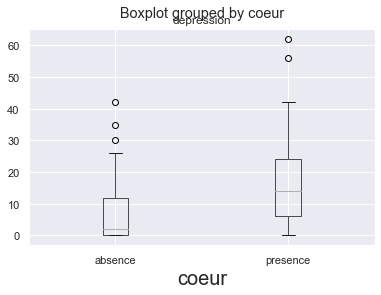

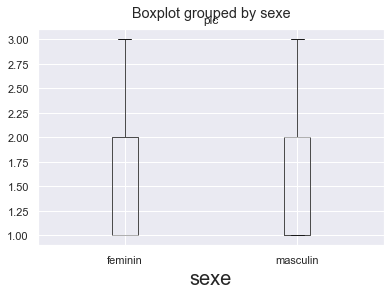

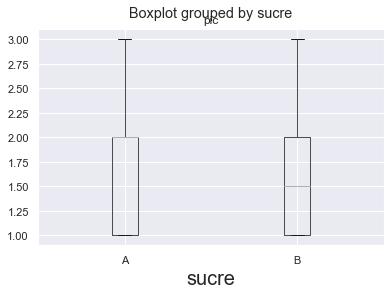

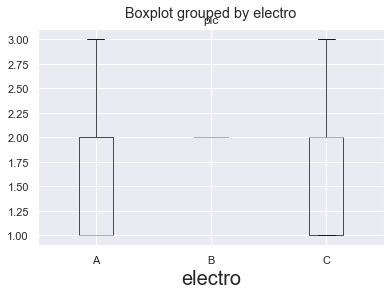

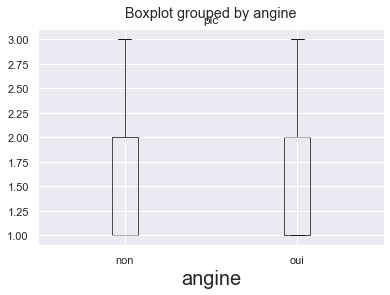

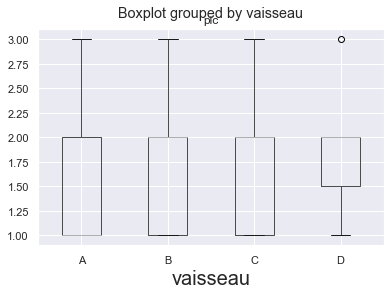

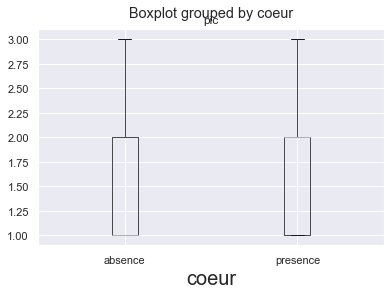

In [8]:
for quant in quanti_columns:
    for quali in quali_columns:
        df.boxplot(column=quant,by=quali)
        plt.show()
        

+ ### Les Variables qualitatives

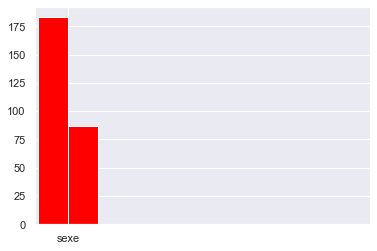

In [9]:
#plt.bar(df['sexe'],df.shape[])
sex = df['sexe'].value_counts()
sucre = df['sucre'].value_counts()
tab = [sex[0],sex[1]]
barwidth = 0.1
x1 = [0,0.1]
#x2 = range(len(sucre))
plt.bar(x1,tab,width=barwidth,color='red')
plt.xticks([r+barwidth/2 for r in range(len(tab))],['sexe',''])
plt.show()
#plt.bar(x2,sucre,width=5)

2. ## Tracer de graphique pour chaque variable du Dataset avec la Librairie Seaborn

+ ### Pour Les variable quantitative

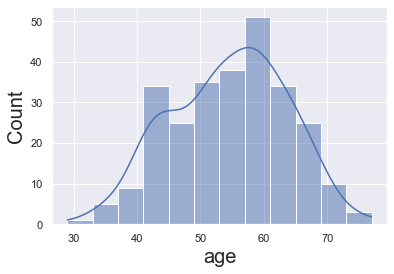

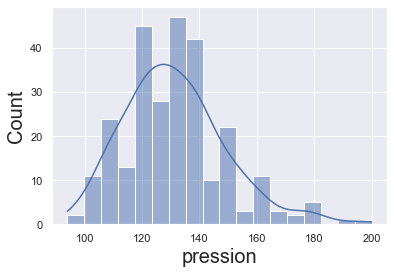

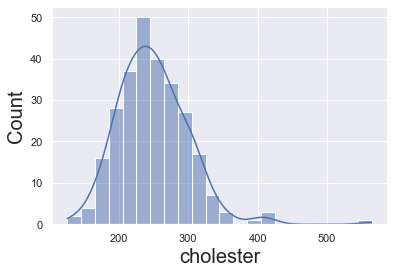

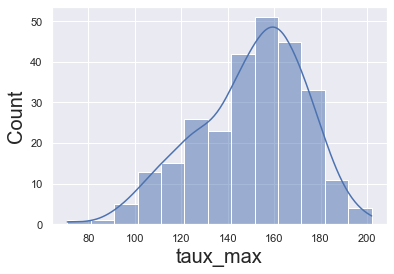

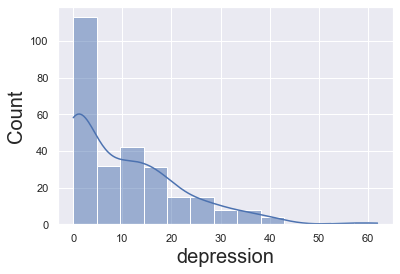

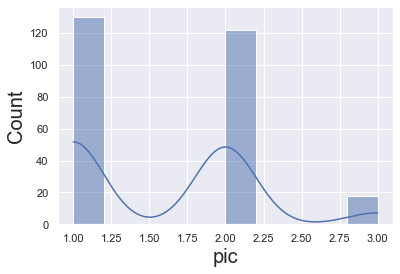

In [10]:
for col in quanti_columns:
    sns.histplot(data = df[col], kde=True)
    plt.show()

+  ### Les variables qualitative

+ ### Les variables quantitative

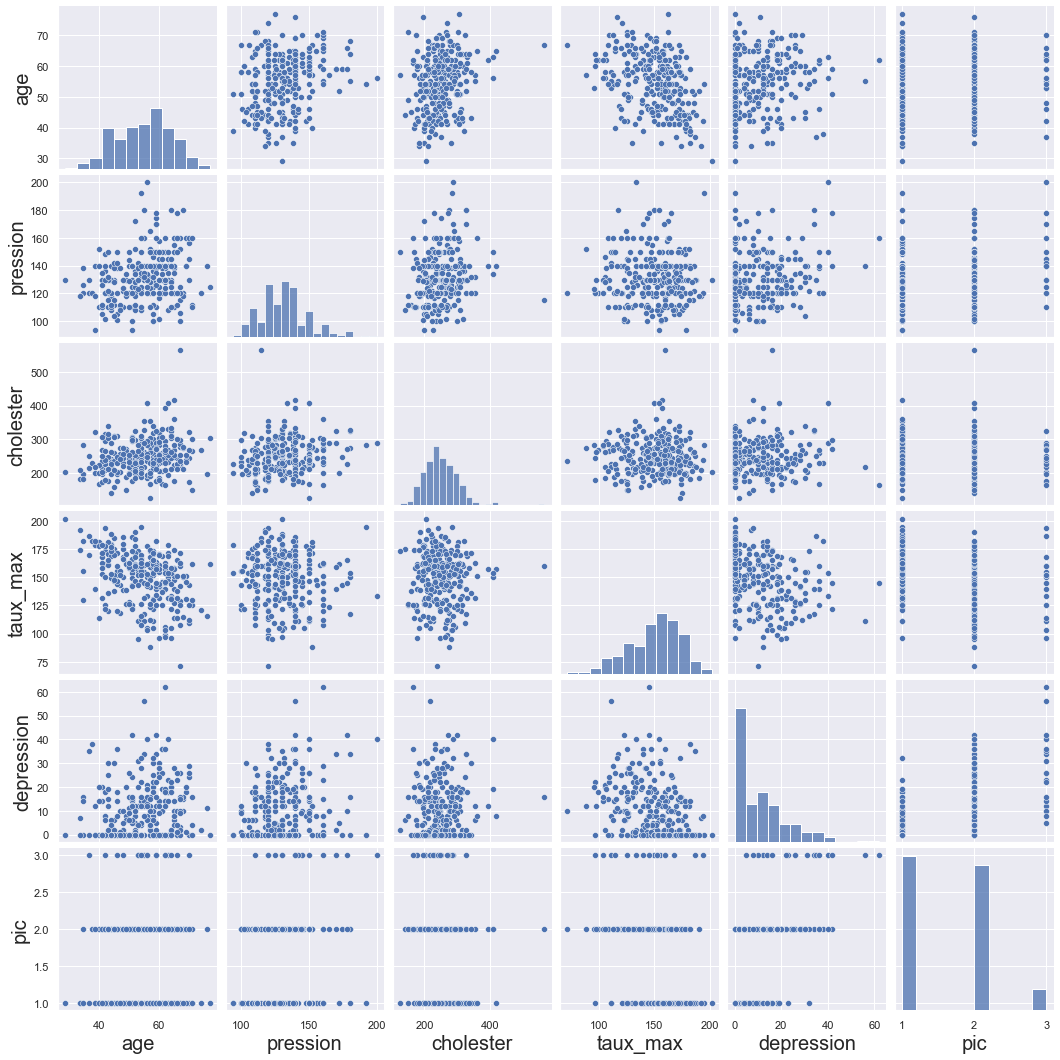

In [11]:
sns.pairplot(df[quanti_columns])
plt.show()

+ ### Les variables quantitative et qualitative

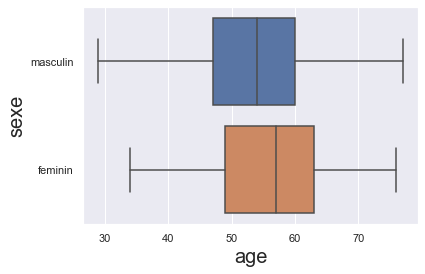

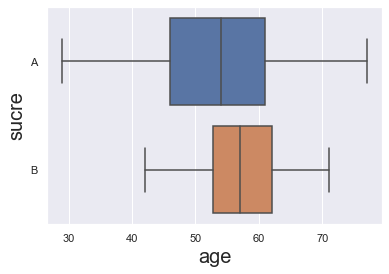

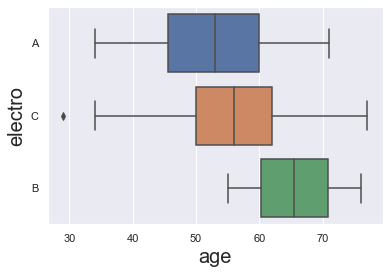

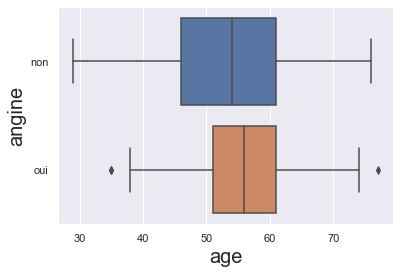

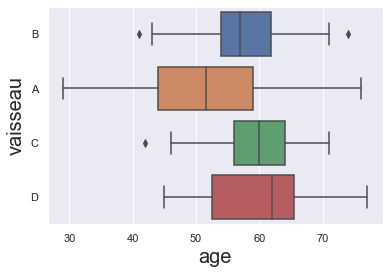

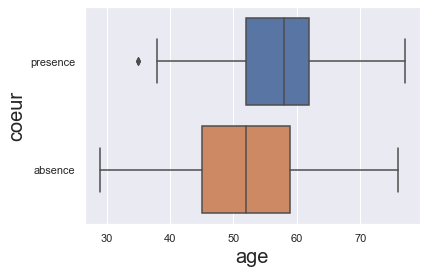

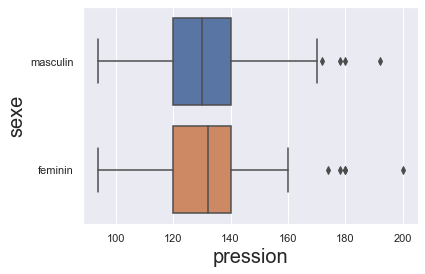

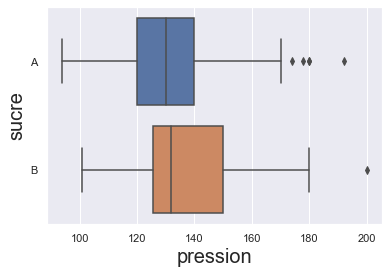

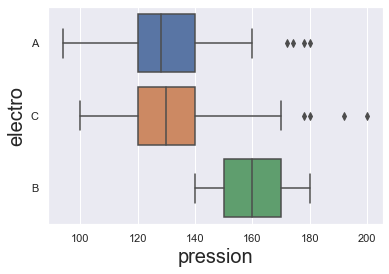

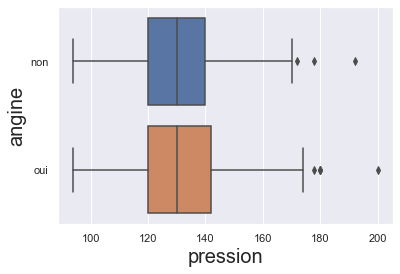

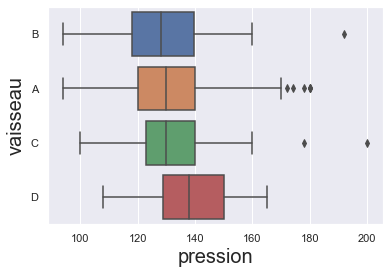

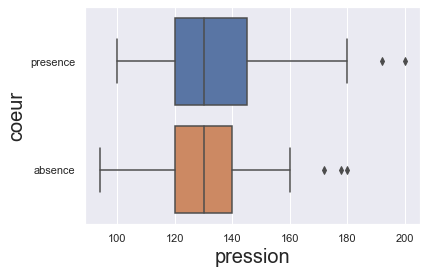

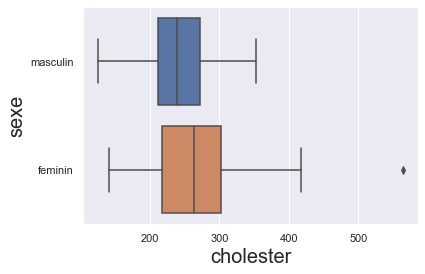

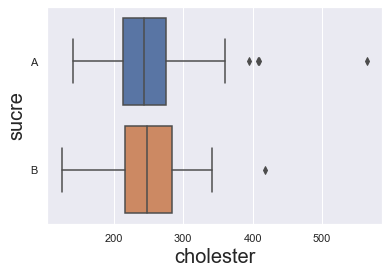

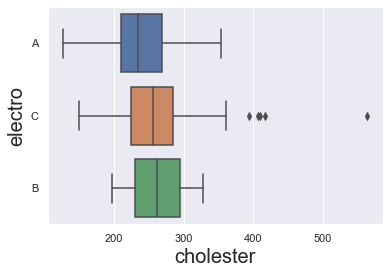

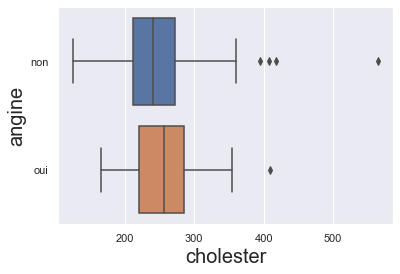

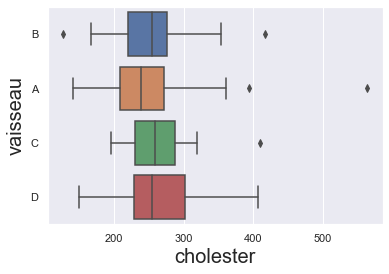

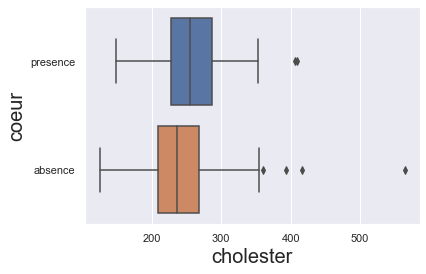

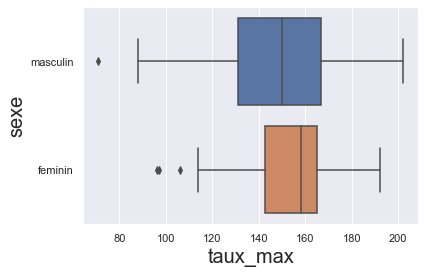

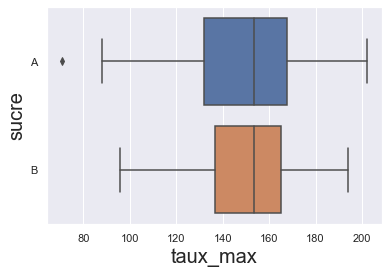

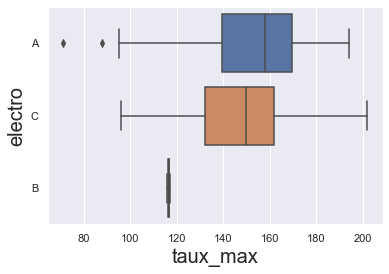

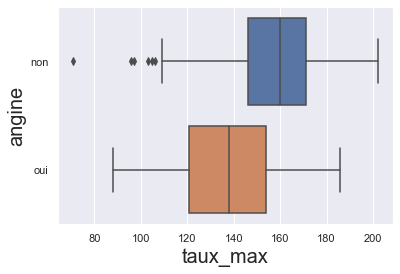

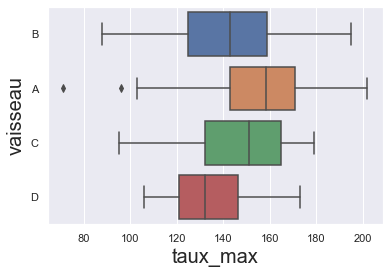

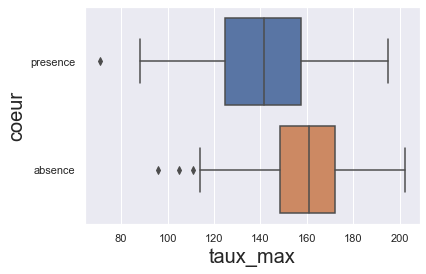

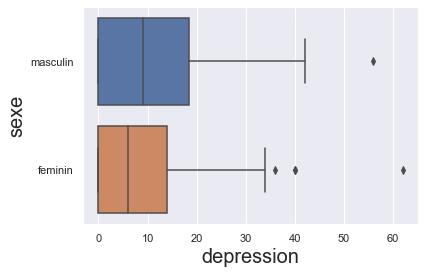

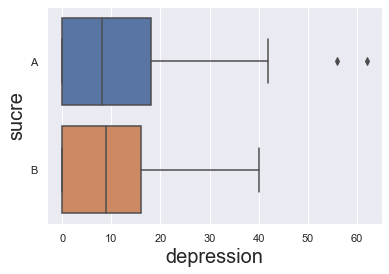

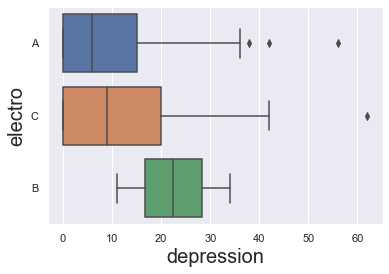

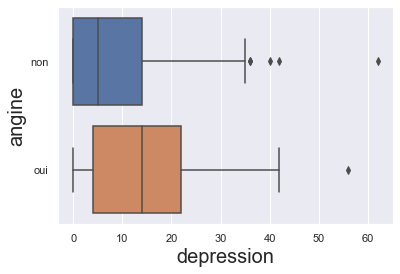

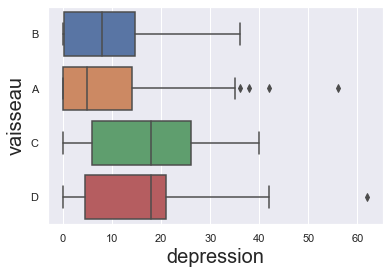

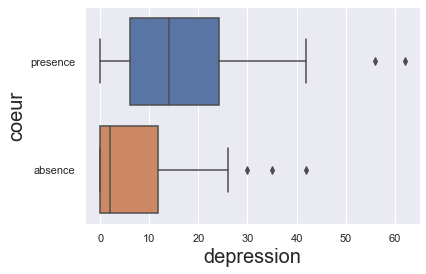

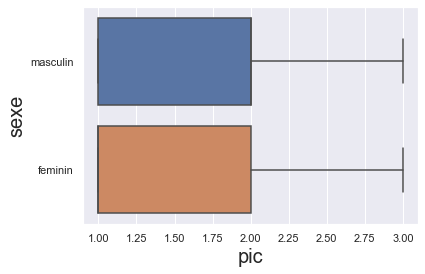

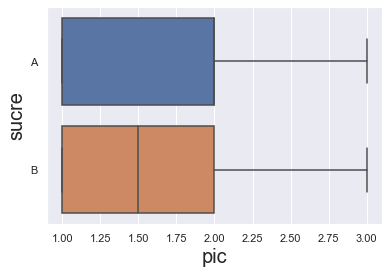

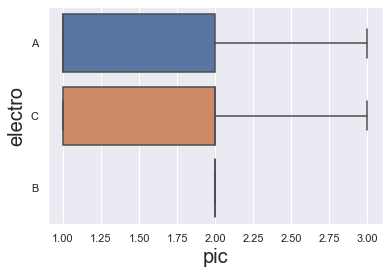

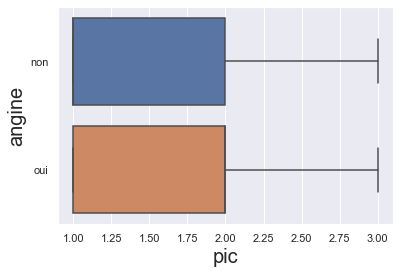

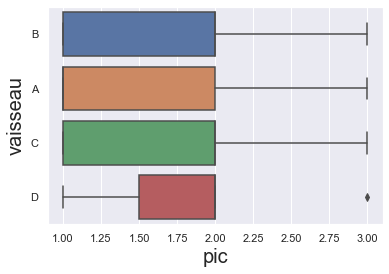

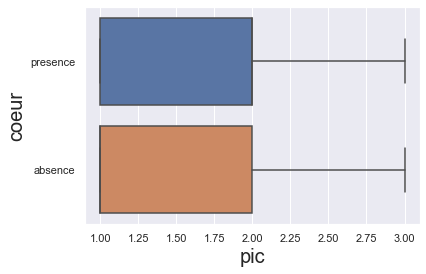

In [12]:
for quant in quanti_columns:
    for quali in quali_columns:
        sns.boxplot(x = df[quant], y = df[quali])
        plt.show()


## 3.Application de la Regression Logistique sur le Dataset "Heart"

In [29]:
#Affichage deu dataset
df.shape

(270, 12)

+ ### Chargement des Librairies

In [15]:

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

+ ### Division du Dataset en données d'entrainement et données de test

In [20]:
X = df[['age','pression','cholester','taux_max']].values
#Y = df['taux_max']
y = df['coeur']
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

+ ### Instantiation du model de Regression Linéaire de la Librairie [SKLEARN](https://scikit-learn.org) et Entrainement du model

In [22]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

+ ### Test du Model avec les données de Test et Affichage des valeurs prédictent

In [23]:
y_predict = log.predict(X_test)

In [24]:
y_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

+ ### Affichage du graphe des valeurs réels et des valeurs prédictent

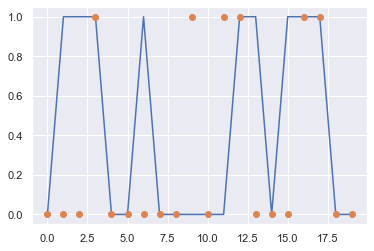

In [30]:
n = 20
plt.plot(Y_test[:n])
plt.plot(y_predict[:n],'o')
plt.show()

+ ### Score du model

In [33]:
s = log.score(X,y)
print(f'Le score du model est :{s}')

Le score du model est :0.6925925925925925
